In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)
import os

# matplotlib and seaborn for plotting
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()

In [2]:
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
products = pd.read_csv('products.csv')

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
aisles.shape

(134, 2)

In [5]:
departments.head(), departments.shape

(   department_id department
 0              1     frozen
 1              2      other
 2              3     bakery
 3              4    produce
 4              5    alcohol,
 (21, 2))

In [6]:
orders.head(), orders.shape

(   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
 0   2539329        1    prior             1          2                  8   
 1   2398795        1    prior             2          3                  7   
 2    473747        1    prior             3          3                 12   
 3   2254736        1    prior             4          4                  7   
 4    431534        1    prior             5          4                 15   
 
    days_since_prior_order  
 0                     NaN  
 1                    15.0  
 2                    21.0  
 3                    29.0  
 4                    28.0  ,
 (3421083, 7))

In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
departments.department.unique()

array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

In [11]:
len(aisles.aisle.unique())

134

In [12]:
orders.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [13]:
orders.user_id.value_counts()

82420     100
154678    100
134199    100
60040     100
143177    100
         ... 
109381      4
169577      4
167530      4
105283      4
185566      4
Name: user_id, Length: 206209, dtype: int64

In [14]:
len(orders.user_id.unique())

206209

In [15]:
orders[orders['user_id']==152340]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
2531775,1449611,152340,prior,1,1,16,NaN
2531776,2514100,152340,prior,2,2,20,1.0
2531777,703955,152340,prior,3,6,19,4.0
2531778,2369974,152340,prior,4,1,16,2.0
2531779,1611418,152340,prior,5,1,13,7.0
...,...,...,...,...,...,...,...
2531870,2426258,152340,prior,96,2,10,5.0
2531871,2844510,152340,prior,97,3,18,1.0
2531872,2422272,152340,prior,98,0,9,4.0
2531873,540084,152340,prior,99,4,20,4.0


In [16]:
orders[orders['order_number']==100]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
3264,3176785,210,train,100,1,12,5.0
5122,988,310,train,100,2,9,4.0
5243,2956359,313,train,100,1,6,4.0
11182,3327840,690,train,100,4,11,2.0
12588,90628,786,train,100,0,10,2.0
...,...,...,...,...,...,...,...
3408960,1664187,205483,train,100,2,9,3.0
3410122,2720227,205543,train,100,2,18,8.0
3415733,105274,205878,train,100,1,13,7.0
3417312,68079,205972,train,100,5,10,0.0


In [17]:
orders[orders['user_id']==4]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
39,3343014,4,prior,1,6,11,NaN
40,2030307,4,prior,2,4,11,19.0
41,691089,4,prior,3,4,15,21.0
42,94891,4,prior,4,5,13,15.0
43,2557754,4,prior,5,5,13,0.0
44,329954,4,test,6,3,12,30.0


In [18]:
#orders.order_number.describe()

In [19]:
len(orders.order_id.unique())

3421083

In [20]:
len(orders.user_id.unique())

206209

In [21]:
orders['eval_set'].unique()

array(['prior', 'train', 'test'], dtype=object)

In [22]:
orders['eval_set'].value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [23]:
orders.user_id.value_counts().head(20)

82420     100
154678    100
134199    100
60040     100
143177    100
144435    100
133426    100
196314    100
99132     100
106823    100
70742     100
98628     100
69974     100
143434    100
9333      100
35048     100
63718     100
127547    100
100916    100
164927    100
Name: user_id, dtype: int64

In [24]:
orders.user_id.value_counts().describe()

count    206209.000000
mean         16.590367
std          16.654774
min           4.000000
25%           6.000000
50%          10.000000
75%          20.000000
max         100.000000
Name: user_id, dtype: float64

In [25]:
orders.order_number.describe()

count    3.421083e+06
mean     1.715486e+01
std      1.773316e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.300000e+01
max      1.000000e+02
Name: order_number, dtype: float64

In [26]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

In [27]:
order_number

4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: order_number, Length: 97, dtype: int64

In [28]:
orders.groupby(['user_id'])['order_number'].count().sort_values(ascending=False)


user_id
152340    100
185641    100
185524    100
81678     100
70922     100
         ... 
13046       4
70208       4
111440      4
31762       4
47980       4
Name: order_number, Length: 206209, dtype: int64

In [29]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

In [30]:
order_number.tail()

94    57
91    56
97    54
98    50
99    47
Name: order_number, dtype: int64

In [31]:
#fig, ax = plt.subplots(figsize=(15,8))
#ax = sns.barplot(x = order_number.index, y = order_number.values, color = color[3])
#ax.set_xlabel('Orders per customer')
#ax.set_ylabel('Count')
#ax.xaxis.set_tick_params(rotation=90, labelsize=10)
#ax.set_title('Frequency of Total Orders by Customers')
#fig.savefig('Frequency of Total Orders by Customers.png')

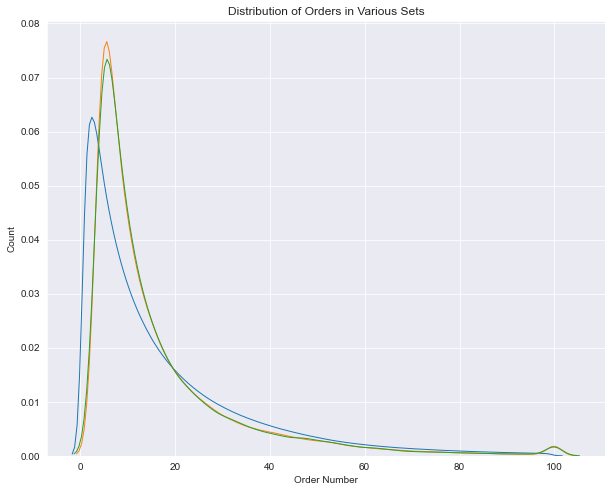

In [32]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
#fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

In [33]:
orders.order_dow.value_counts()

0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: order_dow, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


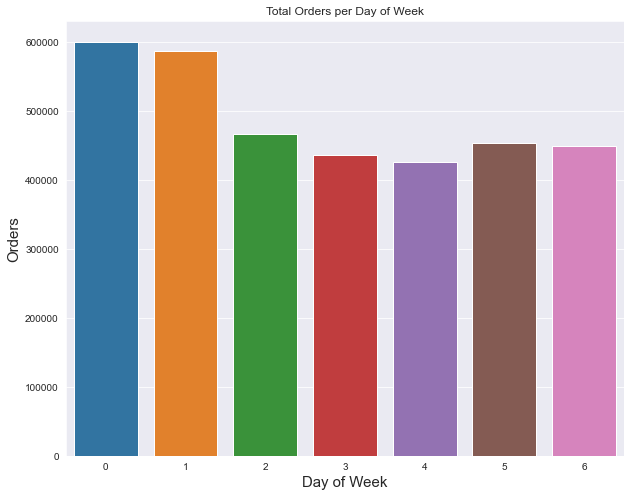

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(orders.order_dow)
ax.set_xlabel('Day of Week', size = 15)
ax.set_ylabel('Orders', size = 15)
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Total Orders per Day of Week')
fig.savefig('Total Orders per Day of Week.png')
plt.show()

In [39]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()


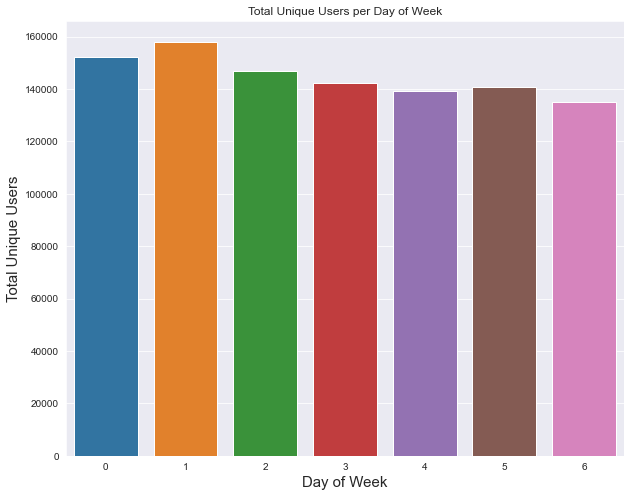

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 15)
ax.set_ylabel('Total Unique Users', size = 15)
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Total Unique Users per Day of Week')
fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


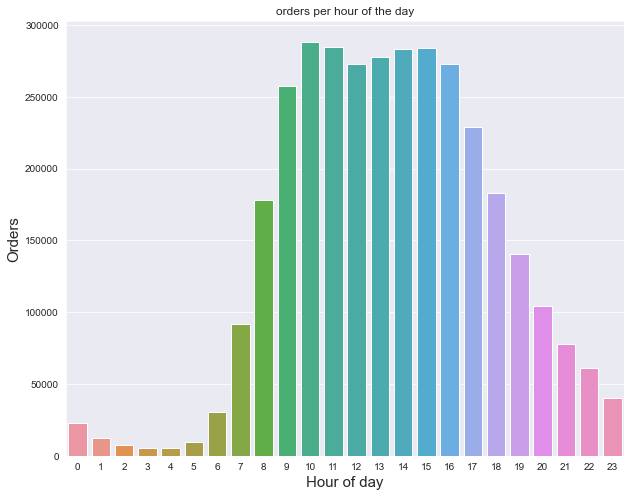

In [42]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(orders.order_hour_of_day)
ax.set_xlabel('Hour of day', size = 15)
ax.set_ylabel('Orders', size = 15)
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('orders per hour of the day')
fig.savefig('Total Orders per Hour of Day.png')
plt.show()

In [43]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


In [44]:
temp_df

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,38313,37915,35714,36296,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,35665,36994,37121,37564,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


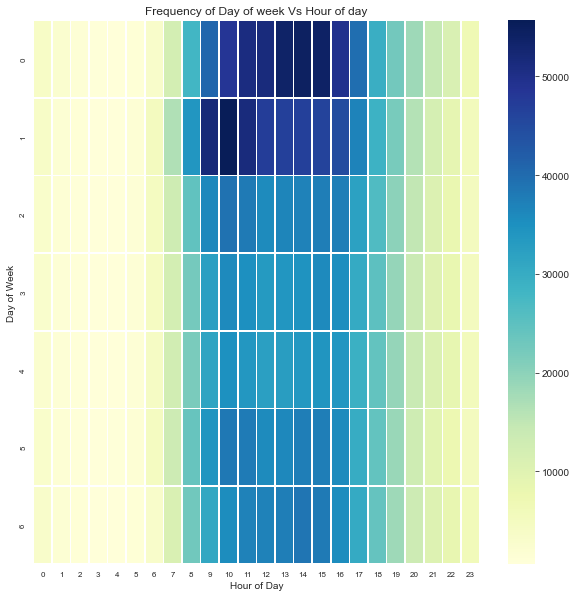

In [45]:
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

In [46]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [60]:
order_products_prior['product_id'].nunique()

49677

In [63]:
order_products_prior.groupby('product_id')['reordered'].sum().sort_values(ascending=False)

product_id
24852    398609
13176    315913
21137    205845
21903    186884
47209    170131
          ...  
42034         0
14116         0
30711         0
42031         0
10579         0
Name: reordered, Length: 49677, dtype: int64

In [48]:
len(order_products_prior.order_id.unique())

3214874

In [49]:
order_products_prior.add_to_cart_order.value_counts()

1      3214874
2      3058126
3      2871133
4      2664106
5      2442025
        ...   
141          1
142          1
143          1
144          1
145          1
Name: add_to_cart_order, Length: 145, dtype: int64

In [52]:
#add_to_cart_order_prior = order_products_prior.groupby('product_id')['reordered'].aggregate("count").sort_values(ascending=False)
#add_to_cart_order_prior

In [53]:
add_to_cart_order_prior = order_products_prior.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order_prior = add_to_cart_order_prior.value_counts()

In [54]:
add_to_cart_order_prior

5      228330
6      227675
4      222081
7      220006
3      207027
        ...  
114         1
112         1
94          1
90          1
145         1
Name: add_to_cart_order, Length: 113, dtype: int64

In [56]:
len(order_products_prior[order_products_prior['order_id'] == 5])

26

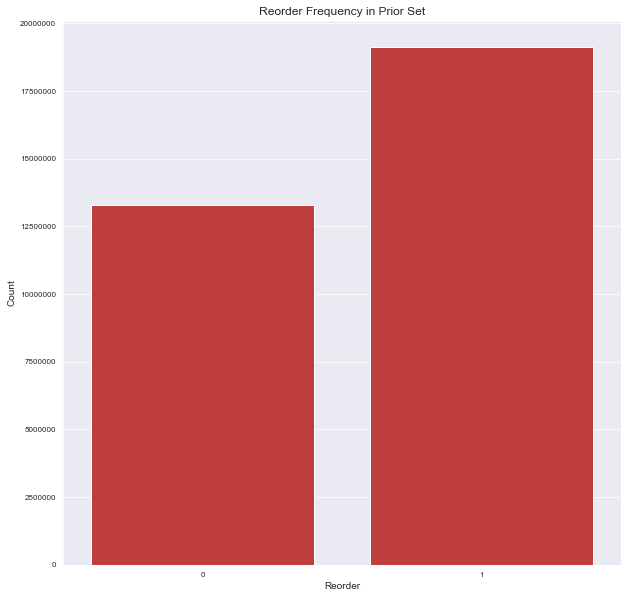

In [58]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.barplot(x = order_products_prior.reordered.value_counts().index, 
                y = order_products_prior.reordered.value_counts().values, color = color[3])
ax.set_xlabel('Reorder', size = 10)
ax.set_ylabel('Count', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Reorder Frequency in Prior Set')
fig.savefig('Reorder Frequency in Prior Set')
plt.show()

In [64]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [66]:
products.product_name.nunique()

49688

In [67]:
products.aisle_id.nunique()

134

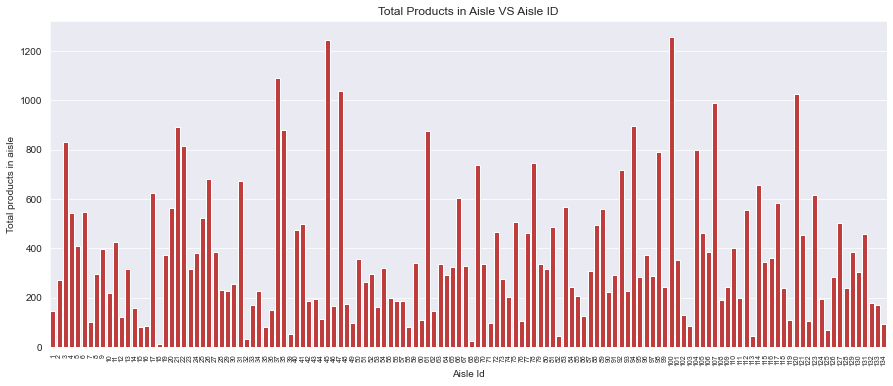

In [68]:
temp_df = products.groupby('aisle_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (15,6))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[3])
ax.set_xlabel('Aisle Id')
ax.set_ylabel('Total products in aisle')
ax.xaxis.set_tick_params(rotation=90, labelsize = 7)
ax.set_title('Total Products in Aisle VS Aisle ID', size = 12)
fig.savefig('Total Products in Aisle VS Aisle ID.png')

In [69]:
products.groupby('aisle_id')['product_id'].count().sort_values(ascending=False)

aisle_id
100    1258
45     1246
37     1091
47     1038
120    1026
       ... 
113      47
82       44
32       32
68       26
18       12
Name: product_id, Length: 134, dtype: int64

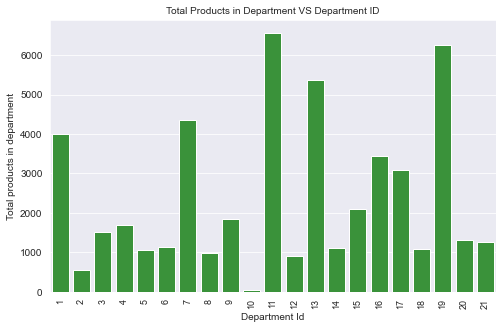

In [70]:
temp_df = products.groupby('department_id')['product_id'].count()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values, color = color[2])
ax.set_xlabel('Department Id')
ax.set_ylabel('Total products in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Products in Department VS Department ID', size = 10)
fig.savefig('Total Products in Department VS Department ID.png')

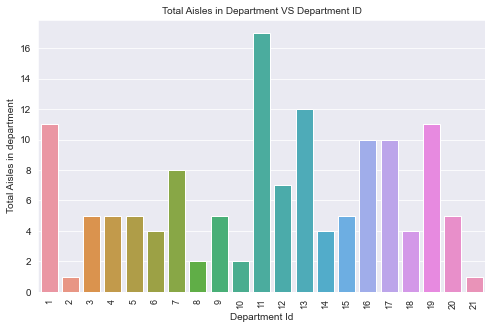

In [71]:
temp_df = products.groupby('department_id')['aisle_id'].nunique()

fig, ax = plt.subplots(figsize = (8,5))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Department Id')
ax.set_ylabel('Total Aisles in department')
ax.xaxis.set_tick_params(rotation=90, labelsize = 9)
ax.set_title('Total Aisles in Department VS Department ID', size = 10)
fig.savefig('Total Aisles in Department VS Department ID.png')